<a href="https://colab.research.google.com/github/inacios777/Expressao-Facial/blob/main/L05P01_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Redes Neurais e Aprendizado Profundo**
# **Trabalho Final - Aplicação de um modelo de redes neurais/deep learning**
**Autor**: Rafael Inácio Silva

**Descrição**: Desenvolva um modelo usando alguma das arquiteturas e/ou redes aprendidos nas disciplina. O modelo não precisa ter uma excelente performance, a principal ideia é que você, enquanto aluno e profissional da área use o framework Keras para se familiarizar com os conceitos e com a própria sintaxe da ferramenta.

O processo de treino e consequente melhoria continua dos modelos é algo que vemos durante o dia-a-dia de um especialista em Dados ou em IA/ML/DL, por isso não se preocupe em ter o melhor modelo para o problema em questão.

Orientações gerais para realização da atividade:

A ideia da aplicação em um conjunto de dados é realizar um treino com algum dataset disponível (ex.: Kaggle) em um notebook no Google Colab;
Usem o Colab pra facilitar a questão da instalação das bibliotecas e da infraestrutura;
Busque explicar o raciocínio no notebook, qual foi o pensamento para tomar cada decisão e o que foi possível concluir sobre o modelo (alguns exemplos: qual pré-processamento de dado foi usado, qualidade do modelo, o que poderia ser feito para melhorar o modelo, dentre outros);
Use a criatividade na hora de explicar;
Recomendo fortemente o uso de células textuais no trabalho para que você possa escrever o seu raciocínio. 

# **BASE DE DADOS**

Os dados consistem em imagens de rostos em tons de cinza de 48x48 pixels. Os rostos foram registrados automaticamente para que o rosto fique mais ou menos centralizado e ocupe aproximadamente a mesma quantidade de espaço em cada imagem.

Cada pasta contem um conjunto de imagens de rosto com base na emoção mostrada na expressão facial em uma das sete categorias (0=Irritado, 1=Nojo, 2=Medo, 3=Feliz, 4=Triste, 5=Surpresa, 6=Neutro).

O conjunto consiste em 35894 exemplos.


# Instalação dos pacotes extras

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! pip install imutils --quiet
! pip install adabelief-tf --quiet
! pip install mlflow --quiet

     |████████████████████████████████| 16.5 MB 40.2 MB/s 
     |████████████████████████████████| 147 kB 76.1 MB/s 
     |████████████████████████████████| 82 kB 544 kB/s 
     |████████████████████████████████| 79 kB 8.8 MB/s 
     |████████████████████████████████| 210 kB 80.0 MB/s 
     |████████████████████████████████| 575 kB 76.9 MB/s 
     |████████████████████████████████| 182 kB 70.8 MB/s 
     |████████████████████████████████| 78 kB 8.5 MB/s 
     |████████████████████████████████| 140 kB 80.6 MB/s 
     |████████████████████████████████| 62 kB 1.8 MB/s 
     |████████████████████████████████| 55 kB 4.3 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 


# Importando os módulos necessários

In [3]:
import os
import cv2
import PIL
import random
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from adabelief_tf import AdaBeliefOptimizer
from sklearn.model_selection import train_test_split

import tensorflow
import tensorflow as tf
from datetime import datetime
import random as python_random
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import (Activation, 
                                     Dropout, 
                                     Dense, 
                                     Flatten, 
                                     BatchNormalization, 
                                     Conv2D, 
                                     MaxPooling2D, 
                                     Lambda, 
                                     Input, 
                                     AveragePooling2D)
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler

# Definindo funções adicionais

In [4]:
def read_data_files(root, folder, sub_folder, file_name):
  with open(os.path.join(root, folder, sub_folder, file_name)) as f:
    files_names = [line.replace('\n','') for line in f.readlines()]
  return files_names

def read_files_names(root, folder):
  return os.listdir(os.path.join(root, folder))

def read_image(root, folder, file_name) -> None:
 return tf.keras.utils.load_img(
      os.path.join(root, folder, file_name),
      grayscale=False,
      color_mode='rgb',
      target_size=None,
      interpolation='nearest'
  )

def reset_seeds():
   np.random.seed(123) 
   python_random.seed(123)
   tensorflow.random.set_seed(1234)

# Definindo as variáveis

In [5]:
# (0=Irritado, 1=Nojo, 2=Medo, 3=Feliz, 4=Triste, 5=Surpresa, 6=Neutro)

root = './drive/MyDrive/Expressão Facial/'

len(os.listdir(os.path.join(root, 'irritado', '0'))), 
len(os.listdir(os.path.join(root, 'nojo', '1')))
len(os.listdir(os.path.join(root, 'medo', '2')))
len(os.listdir(os.path.join(root, 'feliz', '3')))
len(os.listdir(os.path.join(root, 'triste', '4')))
len(os.listdir(os.path.join(root, 'surpresa', '5')))
len(os.listdir(os.path.join(root, 'neutro', '6')))

irritado = read_files_names(root, 'irritado/0')
nojo = read_files_names(root, 'nojo/1')
medo = read_files_names(root, 'medo/2')
feliz = read_files_names(root, 'feliz/3')
triste = read_files_names(root, 'triste/4')
surpresa = read_files_names(root, 'surpresa/5')
neutro = read_files_names(root, 'neutro/6')




# visualização da base

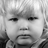

In [6]:
read_image(root, 'irritado/0', irritado[0])

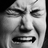

In [7]:
read_image(root, 'nojo/1', nojo[0])

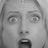

In [8]:
read_image(root, 'medo/2', medo[0])

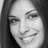

In [9]:
read_image(root, 'feliz/3', feliz[0])

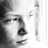

In [10]:
read_image(root, 'triste/4', triste[0])

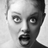

In [11]:
read_image(root, 'surpresa/5', surpresa[0])

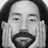

In [12]:
read_image(root, 'neutro/6', neutro[0])

# Característica da imagem para o modelo

In [13]:
image = read_image(root, 'irritado/0', irritado[0])
array = np.asarray(image)
array.shape

(48, 48, 3)

# Gerando o valor de X

In [ ]:
# (0=Irritado, 1=Nojo, 2=Medo, 3=Feliz, 4=Triste, 5=Surpresa, 6=Neutro)

width = 48
height = 48
channels = 3
size = (height, width)

# X_irritado = [np.array(image).astype('float32')/255  for image in 
 #                    [read_image(root,'irritado/0', image_name).resize(size) for image_name in irritado]]

# X_nojo = [np.array(image).astype('float32')/255  for image in 
 #                     [read_image(root,'nojo/1', image_name).resize(size) for image_name in nojo]]

# X_medo = [np.array(image).astype('float32')/255  for image in 
 #                    [read_image(root,'medo/2', image_name).resize(size) for image_name in medo]]

X_feliz = [np.array(image).astype('float32')/255  for image in 
                     [read_image(root,'feliz/3', image_name).resize(size) for image_name in feliz]]

X_triste = [np.array(image).astype('float32')/255  for image in 
                     [read_image(root,'triste/4', image_name).resize(size) for image_name in triste]]

# X_surpresa = [np.array(image).astype('float32')/255  for image in 
 #                     [read_image(root,'surpresa/5', image_name).resize(size) for image_name in surpresa]]

# X_neutro = [np.array(image).astype('float32')/255  for image in 
  #                    [read_image(root,'neutro/6', image_name).resize(size) for image_name in neutro]]                     

# Gerando o valor de Y

In [ ]:
# (0=Irritado, 1=Nojo, 2=Medo, 3=Feliz, 4=Triste, 5=Surpresa, 6=Neutro)

# Y_irritado = np.zeros(len(X_irritado))

# Y_nojo = np.ones(len(X_nojo))

# Y_medo = np.ones(len(X_medo))
# for j in range(len(Y_medo)):
#     if Y_medo[j] == 1:
#         Y_medo[j] = 2 

Y_feliz = np.zeros(len(X_feliz))
for j in range(len(Y_feliz)):
    if Y_feliz[j] == 1:
        Y_feliz[j] = 3 

Y_triste = np.ones(len(X_triste))
for j in range(len(Y_triste)):
    if Y_triste[j] == 1:
        Y_triste[j] = 4

# Y_surpresa = np.zeros(len(X_surpresa))
# for j in range(len(Y_surpresa)):
#     if Y_surpresa[j] == 1:
#         Y_surpresa[j] = 5

# Y_neutro = np.ones(len(X_neutro))
# for j in range(len(Y_neutro)):
#     if Y_neutro[j] == 1:
#         Y_neutro[j] = 6 

# Criando o modelo e adicionando as camadas

In [ ]:
reset_seeds()

model = Sequential()
model.add(Conv2D(256, (3,3), activation='relu', input_shape=(width,height, channels)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(7, activation='sigmoid'))

# Vendo a arquitetura do modelo

In [ ]:
img_file = '/tmp/cnn_model.png'
tensorflow.keras.utils.plot_model(model, 
                                  to_file=img_file, 
                                  show_shapes=True, 
                                  show_layer_activations=True)

In [ ]:
model.summary()

# Criando os otimizadores

In [ ]:
learning_rate = 1e-4
ada_belief = AdaBeliefOptimizer(learning_rate=learning_rate)

# Tracking do experimento

In [ ]:
import mlflow

In [ ]:
MLFLOW_TRACKING_URI = 'https://dagshub.com/inacios777/Aula_redes_neurais.mlflow'
MLFLOW_TRACKING_USERNAME = 'inacios777'
MLFLOW_TRACKING_PASSWORD = '6d691438c607ecc3123c696ae8e46500a2f0e19b'

os.environ['MLFLOW_TRACKING_USERNAME'] = MLFLOW_TRACKING_USERNAME
os.environ['MLFLOW_TRACKING_PASSWORD'] = MLFLOW_TRACKING_PASSWORD

mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)

mlflow.tensorflow.autolog(log_models=True, 
                          log_input_examples=True,
                          log_model_signatures=True)

# Compilando o modelo


In [ ]:
model.compile(optimizer=ada_belief,
              loss='binary_crossentropy', 
              metrics=['accuracy', 
                       tf.keras.metrics.Precision(), 
                       tf.keras.metrics.Recall()])

# Separando Treino e Teste

In [ ]:
# (0=Irritado, 1=Nojo, 2=Medo, 3=Feliz, 4=Triste, 5=Surpresa, 6=Neutro)

X_train, X_test, y_train, y_test = train_test_split(np.concatenate((# X_irritado, 
                                                                    # X_nojo,
                                                                    # X_medo, 
                                                                    X_feliz, 
                                                                    X_triste
                                                                    # X_surpresa, 
                                                                    # X_neutro 
                                                                    )), 
                                     to_categorical(np.concatenate((# Y_irritado, 
                                                                    # Y_nojo,
                                                                    # Y_medo, 
                                                                    Y_feliz, 
                                                                    Y_triste
                                                                    # Y_surpresa, 
                                                                    # Y_neutro 
                                                                    ))),
                                      test_size=0.3, random_state=42)

# Executando modelo de treino

In [ ]:
with mlflow.start_run(run_name='expressao_facial_treino'):
  reset_seeds()
  hist = model.fit(X_train, 
                   Y_train, 
                   epochs=2, 
                   validation_split=0.2)

# Analisando Overffiting entre treino e teste

In [ ]:
model.score(X_train, Y_train)

In [ ]:
Y_pred = model.predict(X_test)
accuracy_score(Y_test, Y_pred)

# Avaliando o modelo dados externos

In [ ]:
neymar = tf.keras.utils.load_img(
    root, 'neymar.png',
    grayscale=False,
    color_mode='rgb',
    target_size=None,
    interpolation='nearest'
)
neymar = neymar.resize(size)
neymar = np.expand_dims(neymar, axis=0)
neymar

In [ ]:
mbape = tf.keras.utils.load_img(
    root, 'mbape.png',
    grayscale=False,
    color_mode='rgb',
    target_size=None,
    interpolation='nearest'
)
mbape = mbape.resize(size)
mbape = np.expand_dims(mbape, axis=0)
mbape

In [ ]:
cristiano = tf.keras.utils.load_img(
    root, 'cristiano.png',
    grayscale=False,
    color_mode='rgb',
    target_size=None,
    interpolation='nearest'
)
cristiano = cristiano.resize(size)
cristiano = np.expand_dims(cristiano, axis=0)
cristiano

In [ ]:
messi = tf.keras.utils.load_img(
    root, 'messi.png',
    grayscale=False,
    color_mode='rgb',
    target_size=None,
    interpolation='nearest'
)
messi = messi.resize(size)
messi = np.expand_dims(messi, axis=0)
messi

In [ ]:
# Conferir se possui 4 camadas

neymar.shape

In [ ]:
messi.shape

In [ ]:
mbape.shape

In [ ]:
cristiano.shape

# Resultado

In [ ]:
mbape

In [ ]:
# (0=Irritado, 1=Nojo, 2=Medo, 3=Feliz, 4=Triste, 5=Surpresa, 6=Neutro)


print('Mbappé grita e vibra com pênalti perdido por Harry Kane em Inglaterra x França — Foto: Reprodução/TV Globo')

if model.predict(mbape)[0] < model.predict(mbape)[1]:
  print('TRISTE')
else:
  print('FELIZ')







In [ ]:
cristiano

In [ ]:
print('Cristiano Ronaldo não conteve as lágrimas após a derrota de Portugal')

if model.predict(cristiano)[0] < model.predict(cristiano)[1]:
  print('TRISTE')
else:
  print('FELIZ')

In [ ]:
neymar

In [ ]:
print('Neymar depois da derrota contra Croácia')

if model.predict(neymar)[0] < model.predict(neymar)[1]:
  print('TRISTE')
else:
  print('FELIZ')

In [ ]:
messi

In [ ]:
print('Messi eleito o melhor jogador da Copa do Mundo 2022')

if model.predict(messi)[0] < model.predict(messi)[1]:
  print('TRISTE')
else:
  print('FELIZ')